## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fundamentals = pd.read_csv('fundamentals.csv')
securities = pd.read_csv('securities.csv')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000261CB47E438>],
      dtype=object)

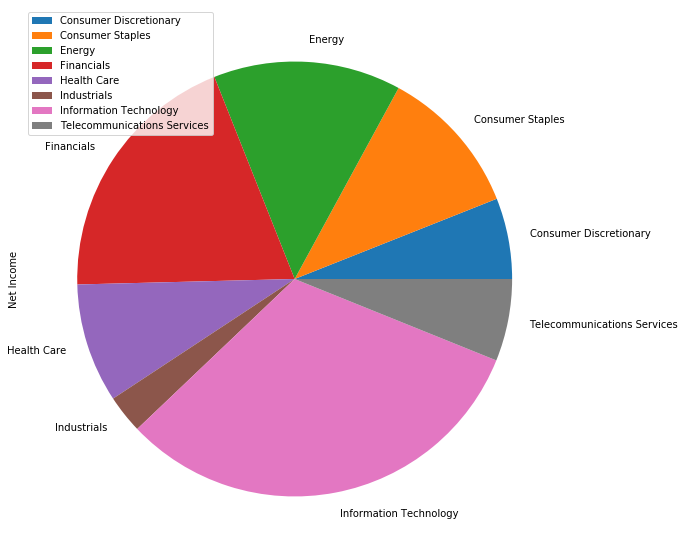

In [106]:
securities = pd.read_csv('securities.csv')
Net_Income= pd.merge(
    fundamentals,
    securities,
    left_on='Ticker symbol', 
    right_on='Ticker symbol'
)
Net_Income=Net_Income.sort_values(["Net Income"],ascending=False).head(100)

Net_Income=Net_Income.groupby('GICS Sector')[['Net Income']].sum()

Net_Income.plot.pie(figsize=(10, 10),subplots=True)


## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

11.686324287324947
8.871579940239098


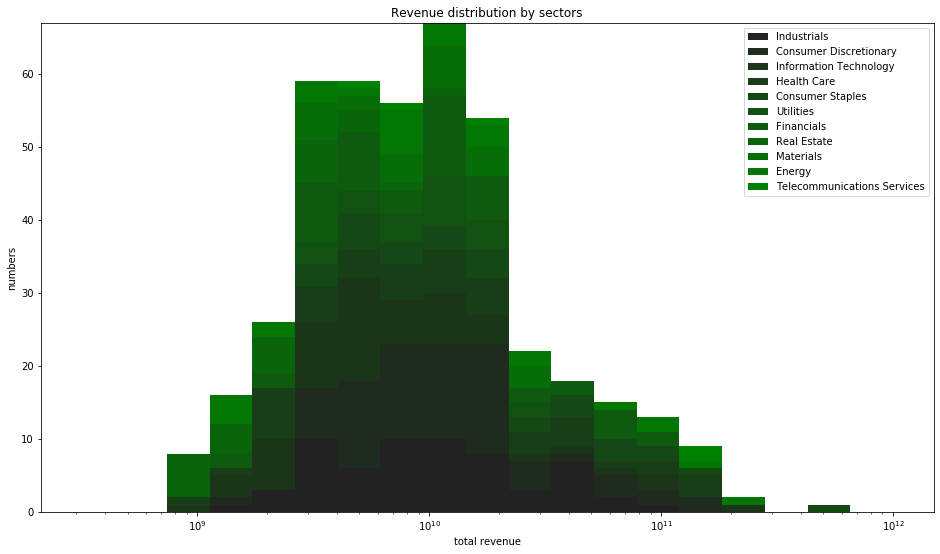

In [136]:

df1 = fundamentals[["Ticker symbol", "Total Revenue", "For Year"]]
df1 = df1[df1["For Year"] > 2014.0]
df1 = df1[df1["For Year"] < 2016.0]
df2 = securities[["Ticker symbol", "GICS Sector"]]

df = pd.merge(df1, df2, left_on="Ticker symbol", right_on="Ticker symbol")

sector_name = df['GICS Sector'].unique()

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_prop_cycle(color=sns.dark_palette("green", n_colors=11))

print(np.log10(df['Total Revenue'].max()))
print(np.log10(df['Total Revenue'].min()))

plt.gca().set_xscale("log")
ax.set_xscale("log")
plt.hist(
    [ df[df['GICS Sector'] == sn]['Total Revenue'] for sn in sector_name ], 
    bins=np.logspace(8.5, 12, 20), 
    density=False, 
    stacked=True)
plt.title("Revenue distribution by sectors")
plt.legend(sector_name)
plt.xlabel('total revenue')
plt.ylabel('numbers')
plt.show()


## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

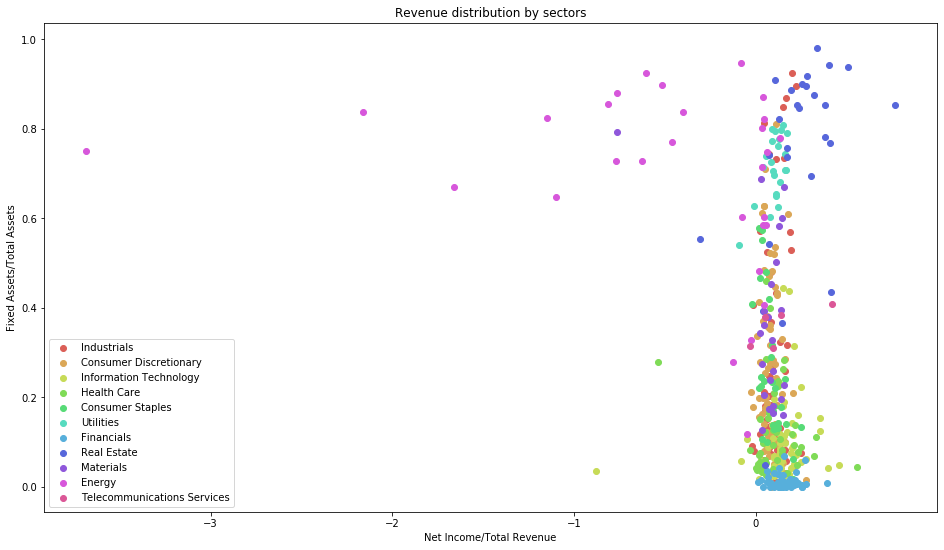

In [137]:
X1 = 'Net Income'
X2 = 'Total Revenue'

Y1 = 'Fixed Assets'
Y2 = 'Total Assets'

df1 = fundamentals[["Ticker symbol", X1, X2, Y1, Y2, "For Year"]]
df1 = df1[df1["For Year"] > 2014.0]
df1 = df1[df1["For Year"] < 2016.0]
df2 = securities[["Ticker symbol", "GICS Sector"]]

df = pd.merge(df1, df2, left_on="Ticker symbol", right_on="Ticker symbol")
sector_name = df['GICS Sector'].unique()

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_prop_cycle(color=sns.hls_palette(11))

for sn in sector_name:
    ax.scatter(df[df['GICS Sector'] == sn][X1] / df[df['GICS Sector'] == sn][X2], 
               df[df['GICS Sector'] == sn][Y1] / df[df['GICS Sector'] == sn][Y2])
plt.title("Revenue distribution by sectors")
plt.legend(sector_name)
plt.xlabel("{}/{}".format(X1, X2))
plt.ylabel("{}/{}".format(Y1, Y2))
plt.show()

In [ ]:
作业比这老师写的